In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Input, Dense, LSTM, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/juni_ispitina_50k/income.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
tr=df['education.num']
tr

,education.num
0,15
1,9
2,10
3,11
4,1
...,...
24995,10
24996,13
24997,13
24998,13


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#ako imaavme missing values za kategoriski i numericki
# categorical_columns = ['education','workclass']
# imputer = SimpleImputer(strategy = 'most_frequent')
# df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [ ]:
#ako imaavme missing values za numericki  i kategoriski


# numerical_culumns = ['hours.per.week']
# imputer_knn = KNNImputer(n_neighbors=5)
# df[numerical_culumns] = imputer_knn.fit_transform(df[numerical_culumns])

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
#dropnuvame nepotrebnite koloni
df=df.drop('fnlwgt',axis=1)


In [ ]:
#zamenuvame dataset ? so null vrednosti da ni prikazi

df.replace('?', np.nan, inplace=True)


In [ ]:
df.isnull().sum()

,0
age,0
workclass,1429
education,0
education.num,0
marital.status,0
occupation,1434
relationship,0
race,0
sex,0
capital.gain,0


In [ ]:
#ako imaavme missing values za kategoriski
categorical_columns = ['workclass','occupation','native.country']
imputer = SimpleImputer(strategy = 'most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,Private,Preschool,1,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
24998,23,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
capital.gain,0


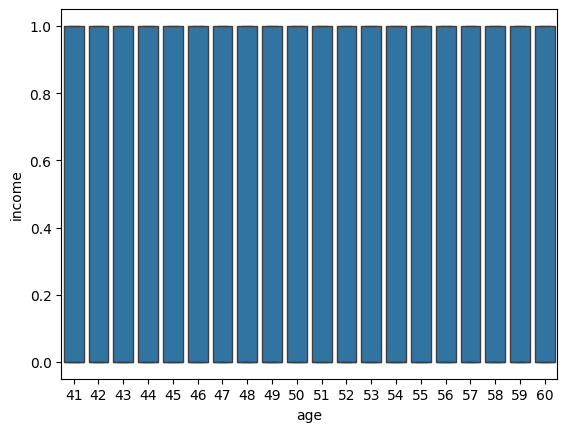

In [ ]:
#6
sns.boxplot(x='age', y='income', data=df[df['age'].between(41, 60)])
plt.show()

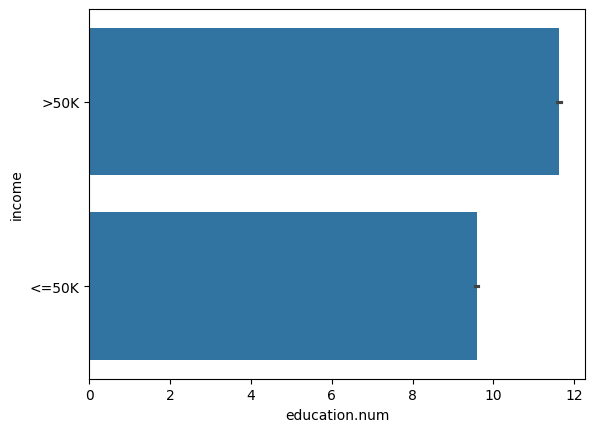

In [ ]:
#7barajne
sns.barplot(x='education.num', y='income', data=df)
plt.show()

In [ ]:
#3 barajne
low_income_percentage = (df['income'] == '<=50K').mean() * 100
print(f'Percentage of people earning <=50K: {low_income_percentage}%')

Percentage of people earning <=50K: 75.82%


In [ ]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,Private,Preschool,1,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
24998,23,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
#gi enkodirame podatocite od kateogorski vo numericki za da prectavime clusters oti tie rabotat samo vo numeric
categorical= ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
for col in categorical:
    df[col]= label_encoder.fit_transform(df[col].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,5,14,15,2,9,0,4,1,99999,0,70,37,1
1,30,3,11,9,0,2,1,4,0,0,0,40,37,0
2,46,3,15,10,2,0,0,4,1,0,0,40,37,1
3,32,3,8,11,2,7,0,4,1,0,0,60,37,1
4,54,3,13,1,2,9,5,4,0,0,0,40,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,3,15,10,4,0,1,4,0,0,0,40,37,0
24996,31,1,9,13,4,9,1,4,0,0,0,50,37,0
24997,38,0,9,13,2,9,0,4,1,0,0,40,37,1
24998,23,3,9,13,4,9,1,4,0,0,0,40,37,0


In [ ]:

#XGBOSS model
features = ['workclass', 'occupation', 'hours.per.week', 'income', 'age', 'sex']
target= 'education.num'

x=df[features]
y=df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 6)
(5000, 6)
(20000,)
(5000,)


In [ ]:
from sklearn.neural_network import MLPRegressor

#Model Neural Test

# Initialize the MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Neural Network (MLPRegressor) Performance:")
print(f"MAE: {mae_mlp}")
print(f"MSE: {mse_mlp}")
print(f"RMSE: {rmse_mlp}")
print(f"R²: {r2_mlp}\n")


Neural Network (MLPRegressor) Performance:
MAE: 1.660739264131265
MSE: 4.881374908079746
RMSE: 2.2093833773430416
R²: 0.27289148811785247



In [ ]:
from sklearn.ensemble import RandomForestRegressor #Random forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest - MAE: 1.6607685182918315, MSE: 5.028526258376767, RMSE: 2.2424375706754396, R²: 0.2509724588790173


In [ ]:
from sklearn.neighbors import KNeighborsRegressor #KNN

# Initialize the model with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MAE: {mae_knn}, MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}")


KNN - MAE: 1.7395200000000002, MSE: 5.479344, RMSE: 2.3407998632945963, R²: 0.18382059625540093


In [ ]:
#Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1.8092927491235775
MSE: 5.806984757318588
RMSE: 2.4097686107422405
R²: 0.13501664491547516


In [ ]:
#XGRegressor model
from xgboost import XGBRegressor
model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10,random_state=42)

In [ ]:
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:39:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.776204873275757
Mean Squared Error (MSE): 5.636783353004491
Root Mean Squared Error (RMSE): 2.3741910944581717
R-squared (R²): 0.16036911059194536


In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual  Predicted
6868       10   9.417990
24016       9  10.498462
9668        7   9.695288
13640      14  10.529431
14018      13  10.704465


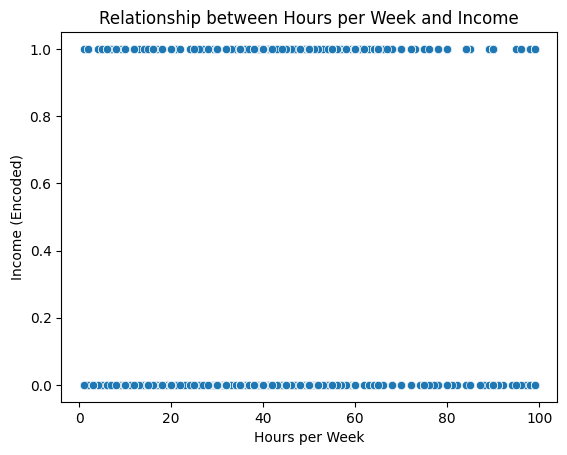

In [ ]:
#Baranje vrskata  na satite so platata korelacija
sns.scatterplot(x='hours.per.week', y='income', data=df)
plt.xlabel('Hours per Week')
plt.ylabel('Income (Encoded)')
plt.title('Relationship between Hours per Week and Income')
plt.show()

In [ ]:
correlation = df['hours.per.week'].corr(df['income']) #korelacija
print(f"Correlation between hours-per-week and income: {correlation}")

Correlation between hours-per-week and income: 0.2287052280234066


In [ ]:
cluster=['age','workclass','education','marital.status','occupation','relationship','race','sex','income','hours.per.week'] #podatocite za clusterirajne

In [ ]:
X = df[cluster]

In [ ]:
list =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    list.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

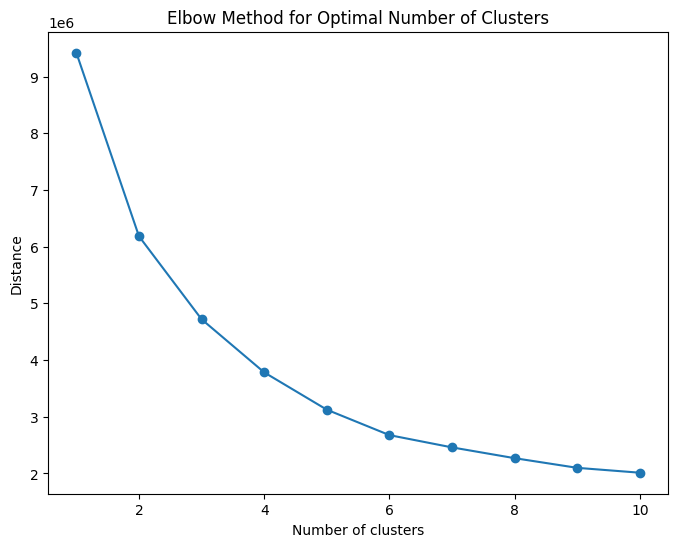

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), list,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show() #na sredina e najdobar modelot 3 ili 4

In [ ]:
kmeans1=KMeans(n_clusters=3,random_state=42)
labels = kmeans1.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

In [ ]:
df['cluster'] = labels

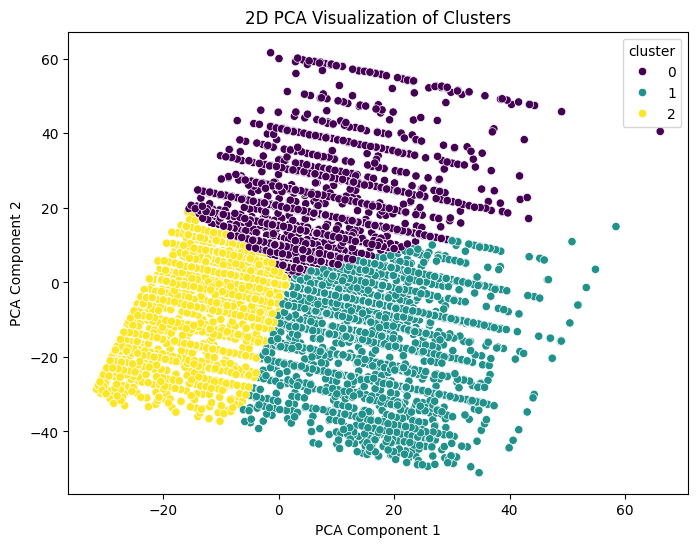

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis',legend='full')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Visualization of Clusters')
plt.show() #ima preklopuvajne ama ne e ic strasno mnogu malce